In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('retail_price.csv')

In [4]:
df['month_year'] = pd.to_datetime(df['month_year']).dt.date
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [5]:
df.describe()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,1847.498521,4.085503,81.028107,...,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,2274.808483,0.232021,62.055560,...,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,1.000000,...,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,34.000000,...,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,62.000000,...,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,1850.000000,4.200000,116.000000,...,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,122.000000,12095.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,9750.000000,4.500000,339.000000,...,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


👉 **Overall:** The dataset is relatively clean, the wide ranges in price and demand are driven by product diversity rather than errors. Outliers (high‑priced or high‑demand items) are likely valid and valuable for insights, so I’ll retain them. Where skewness exists (unit price, demand), I may apply log transformation for modeling, but they don't need to be removed. The next step will be visualizing trends across demand, pricing, and seasonality to confirm these initial observations.

# 📊Exploratory Analysis

### 🎯Demand

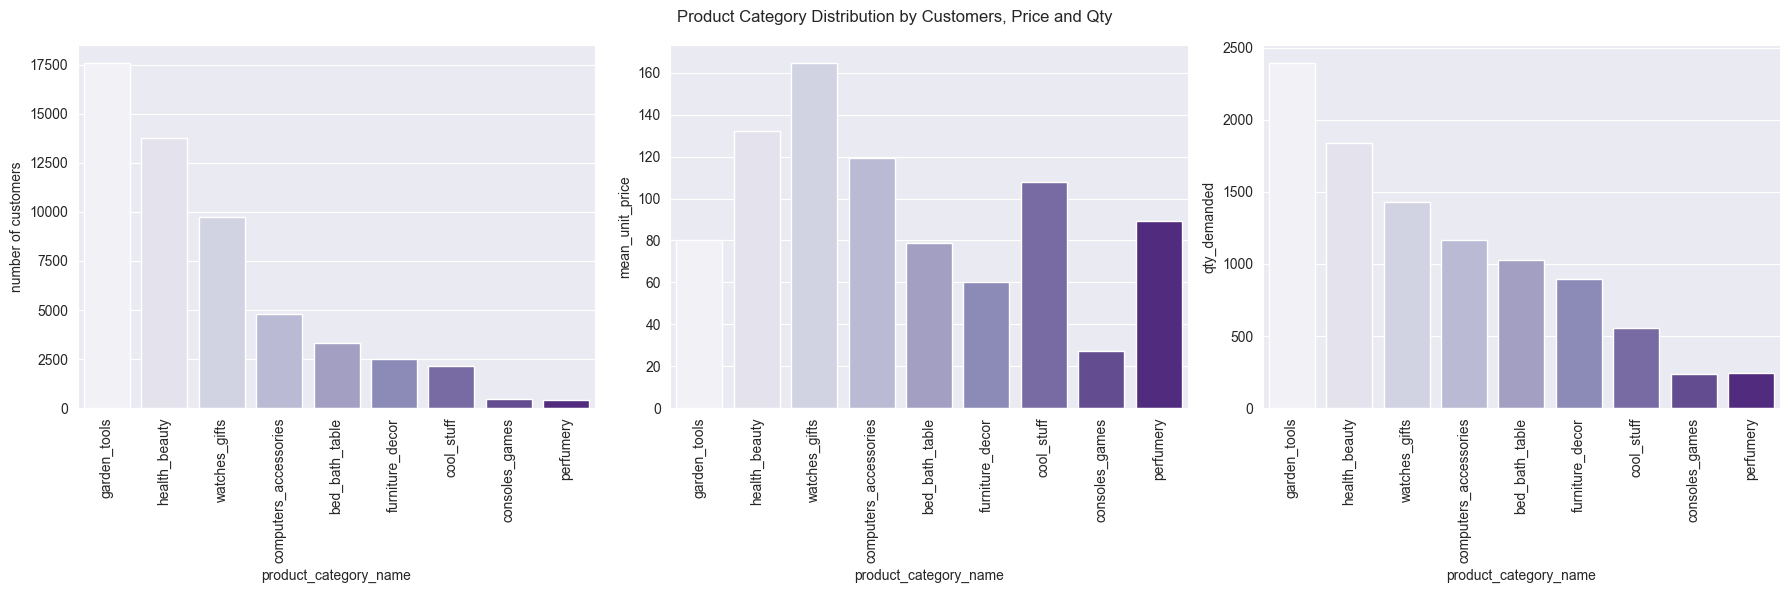

In [56]:
prod_category_df = df.groupby('product_category_name').agg({'customers':'sum', 'unit_price': 'mean', 'qty': 'sum'}).sort_values(by='customers', ascending=False).reset_index()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(['customers', 'unit_price', 'qty']):
    sns.barplot(prod_category_df, x='product_category_name', y=col, ax=axes[i], palette="Purples")
    axes[i].set_ylabel(['number of customers', 'mean_unit_price', 'qty_demanded'][i])
    axes[i].tick_params(axis='x', rotation=90)
fig.suptitle('Product Category Distribution by Customers, Price and Qty')
plt.tight_layout()
plt.show()

Demand and revenue are concentrated in a few key product categories like `garden_tools` and `health_beauty`, showing signs of category imbalance. Some categories ( like `watches_gifts`) are priced higher but generate fewer sales, implying they are premium or niche. <br>
These category-level distinctions will be critical when evaluating price elasticity, since what counts as “outlier pricing” in one category may be “normal” in another.

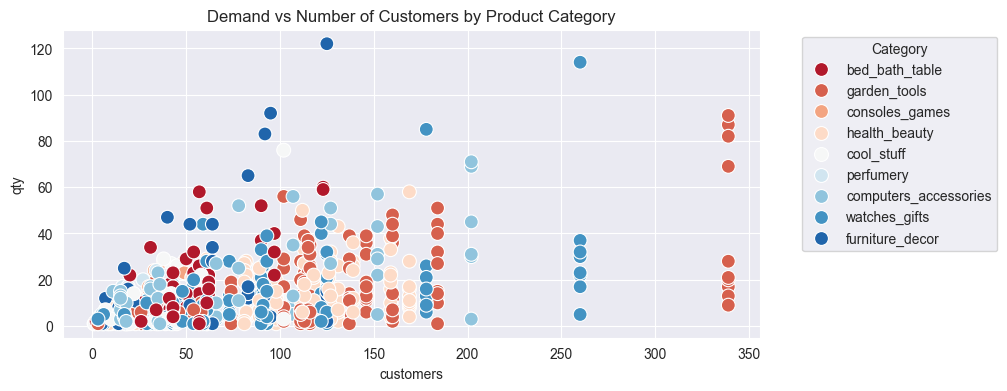

In [55]:
plt.figure(figsize=(9,4))
sns.scatterplot(x='customers', y='qty', data=df, hue='product_category_name', palette='RdBu', s=100)
plt.title('Demand vs Number of Customers by Product Category')
plt.legend(title='Category', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()


From this plot it shows that demand growth is primarily customer-driven, but purchasing behavior differs by product type.<br> Some product categories attract many customers but low unit purchases per customer, while others rely on fewer customers who buy in bulk. <br>This indicates that both customer acquisition and frequency of purchase play different roles across categories

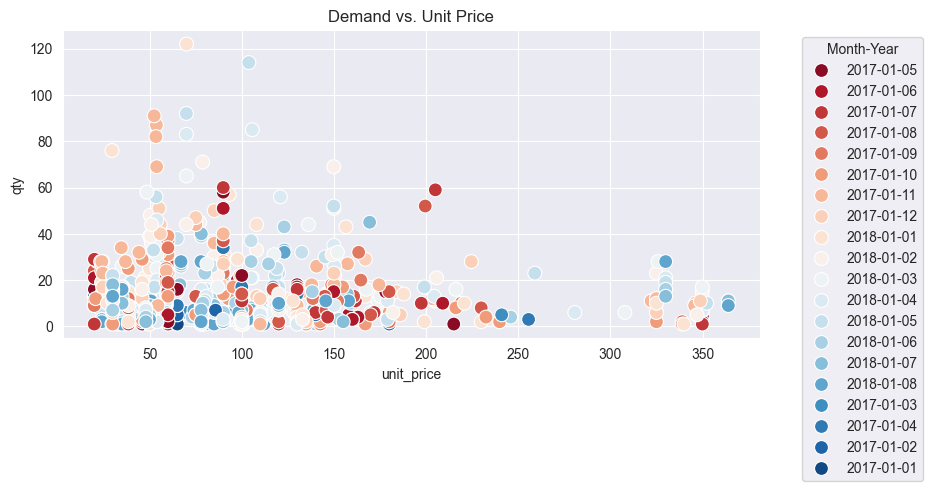

In [54]:
plt.figure(figsize=(9,4))
sns.scatterplot(data=df, x='unit_price', y='qty', hue='month_year', palette='RdBu', s=100)
plt.title('Demand vs. Unit Price')
plt.legend(title='Month-Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

lower-priced products tend to generate significantly higher demand, while higher-priced products are niche and show limited quantity sold.<br> This initial scatter suggests clear price sensitivity at scale. <br>
 further elasticity modeling will clarify the thresholds where demand drops sharply with price increases

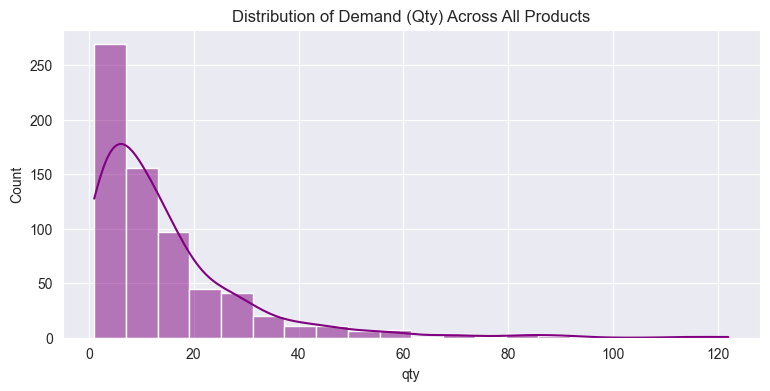

In [52]:
plt.figure(figsize=(9,4))
sns.histplot(df['qty'], bins=20, kde=True, color='purple')
plt.title('Distribution of Demand (Qty) Across All Products')
plt.show()

The distribution plot shows that the demand for the products is heavily right-skewed . This means majority of products sell in small quantities, while a small number of products sell in very large quantities. <br> This is a common pattern in retail data and is not inherently "bad," but it can cause problems for statistical models that assume a more normal distribution.

### 🎯Revenue

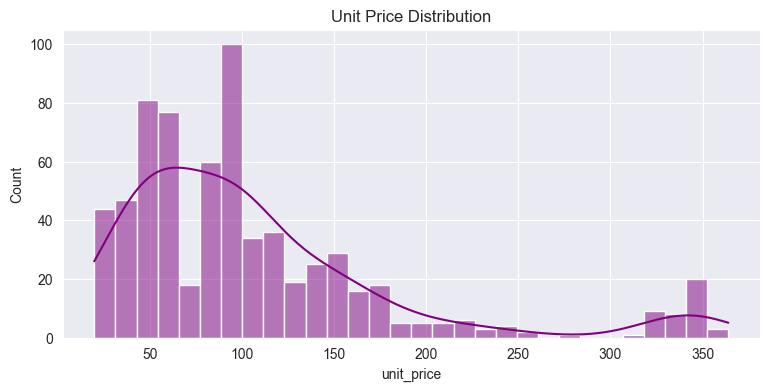

In [51]:
plt.figure(figsize=(9,4))
sns.histplot(df['unit_price'], bins=30, kde=True, color='purple')
plt.title('Unit Price Distribution')
plt.show()

The majority of products fall in the `40–150` price band, confirming that most of the company’s offerings are positioned in the budget-to-mid market range.<br>
Higher prices (`> $200`) are outliers but appear to be legitimate premium categories, not data errors. This shows product diversity rather than anomalies, and also suggests a needed log transformation for modeling

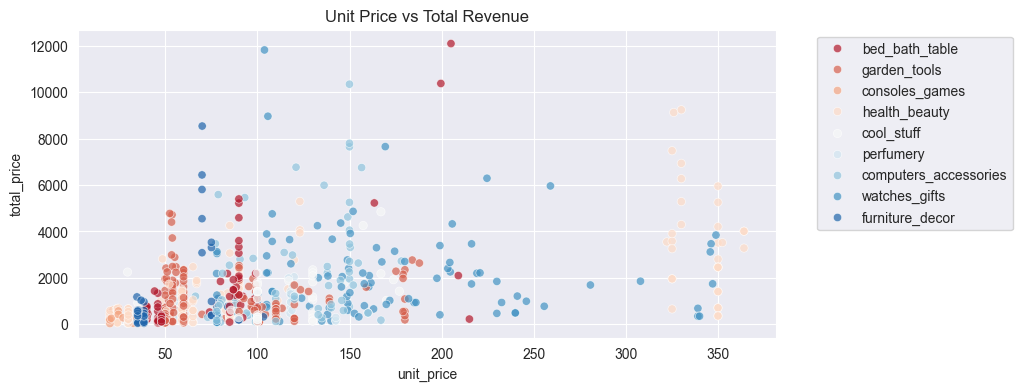

In [59]:
plt.figure(figsize=(9,4))
sns.scatterplot(x='unit_price', y='total_price', data=df, hue='product_category_name', palette='RdBu', alpha=0.7)
plt.title('Unit Price vs Total Revenue')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

The plot shows that revenue is maximized for mid‑tier price products (`80–120`), showing strong demand with reasonable unit price.<br>
 Products in the premium range ('> 250) contribute marginal revenue despite their high price,reinforcing evidence of price sensitivity.
 > From a pricing strategy perspective,the sweet spot for maximizing revenue appears to be `80–120`, while luxury items remain low-volume niche products that may serve branding rather than revenue growth.

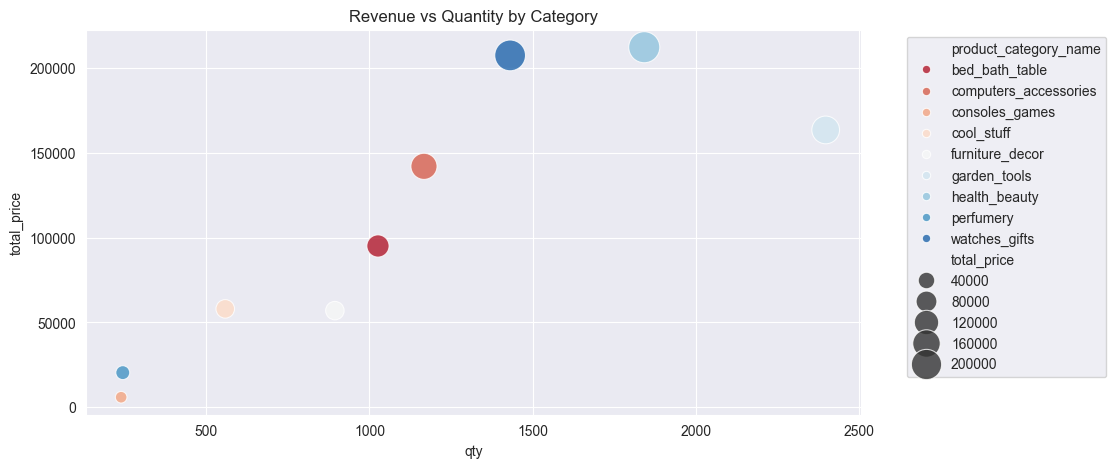

In [60]:
plt.figure(figsize=(10,5))
revenue_df = df.groupby('product_category_name').agg({'qty':'sum', 'total_price':'sum'}).reset_index()
sns.scatterplot(x='qty', y='total_price', size='total_price', hue='product_category_name',
                data=revenue_df, palette='RdBu', sizes=(70, 500), alpha=0.8)
plt.title('Revenue vs Quantity by Category')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

Revenue is largely volume-driven: categories with the most units sold (`watches & gifts`, `health` `beauty`) dominate total revenue. However, `compuer accessories`  deliver solid revenue even at low volumes, leveraging higher unit prices, while categories like `perfumery` and `consoles_games` remain small contributors overall.
> This reinforces that different strategies are required: volume categories benefit from efficiency and retention, while niche/premium categories lean on pricing power

### 🎯Competitor Benchmarking

Let's compute relative price vs comp rating
<br>Relative price = our product’s price – average competitor price

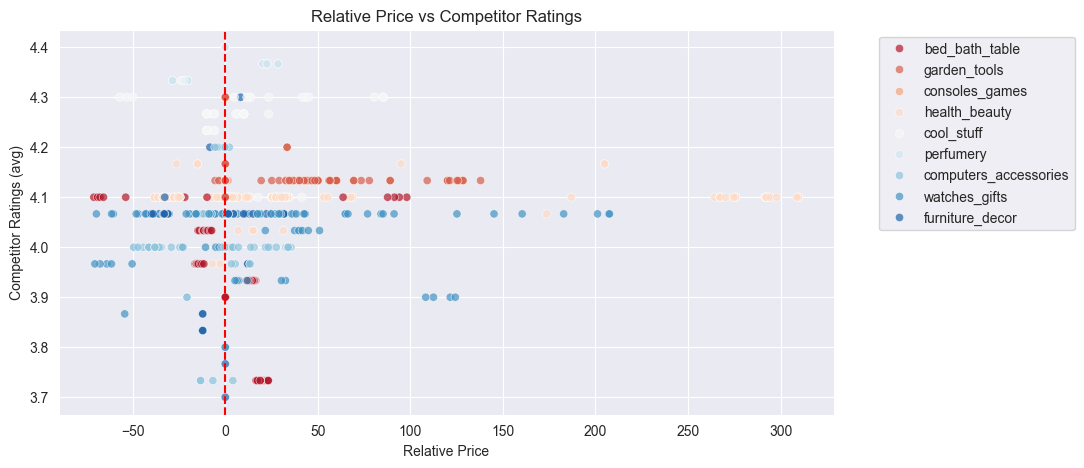

In [68]:
df['comp_avg'] = df[['comp_1', 'comp_2', 'comp_3']].mean(axis=1)

df['relative_price'] = df['unit_price'] - df['comp_avg']

plt.figure(figsize=(10,5))
sns.scatterplot(x='relative_price', y=df[['ps1','ps2','ps3']].mean(axis=1),
                data=df, hue='product_category_name', palette='RdBu', alpha=0.7)
plt.axvline(0, color='red', linestyle='--')  # line at parity pricing
plt.title('Relative Price vs Competitor Ratings')
plt.xlabel('Relative Price')
plt.ylabel('Competitor Ratings (avg)')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

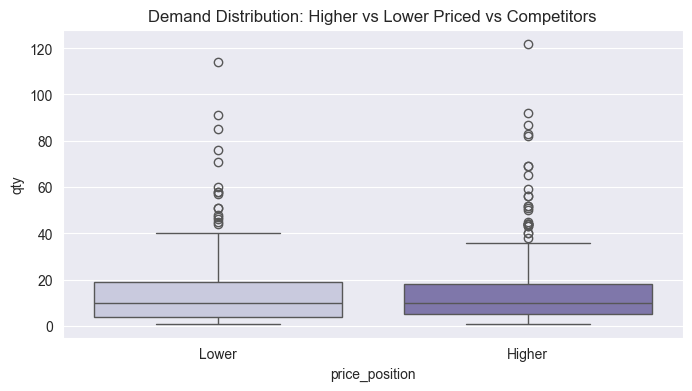

In [70]:
df['price_position'] = df['relative_price'].apply(lambda x: 'Higher' if x > 0 else 'Lower')

plt.figure(figsize=(8,4))
sns.boxplot(x='price_position', y='qty', data=df, palette='Purples')
plt.title('Demand Distribution: Higher vs Lower Priced vs Competitors')
plt.show()

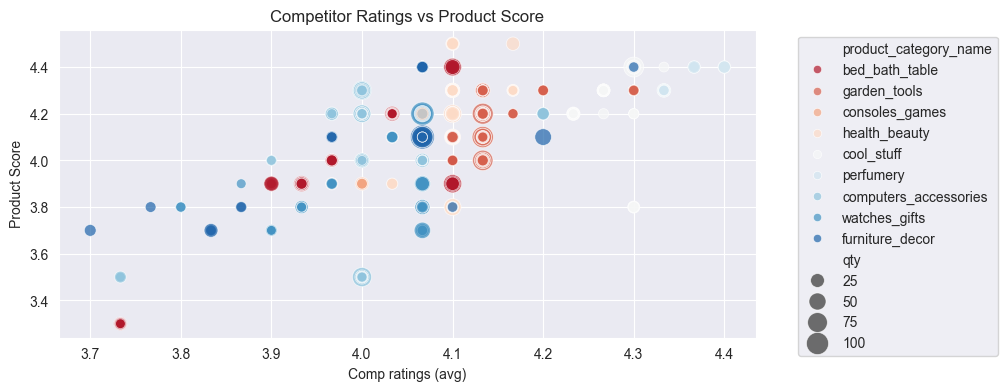

In [73]:
plt.figure(figsize=(9,4))
sns.scatterplot(x=df[['ps1','ps2','ps3']].mean(axis=1),
                y='product_score', size='qty', data=df,
                hue='product_category_name', palette='RdBu', sizes=(50,300), alpha=0.7)
plt.title('Competitor Ratings vs Product Score')
plt.xlabel('Comp ratings (avg)')
plt.ylabel('Product Score')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

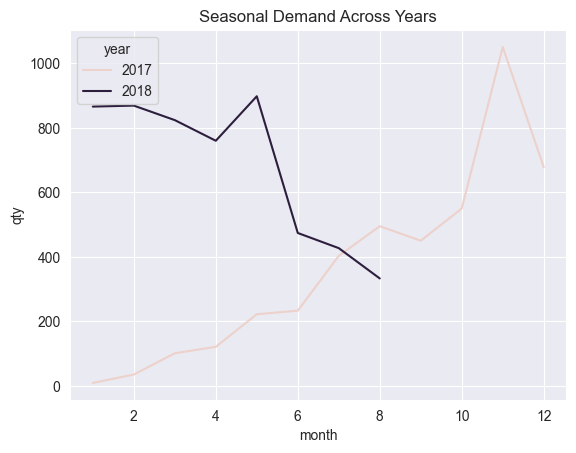

In [10]:
df_month = df.groupby(['year','month']).agg({'qty':'sum','total_price':'sum'}).reset_index()
sns.lineplot(x='month', y='qty', hue='year', data=df_month,)
plt.title("Seasonal Demand Across Years")
plt.show()

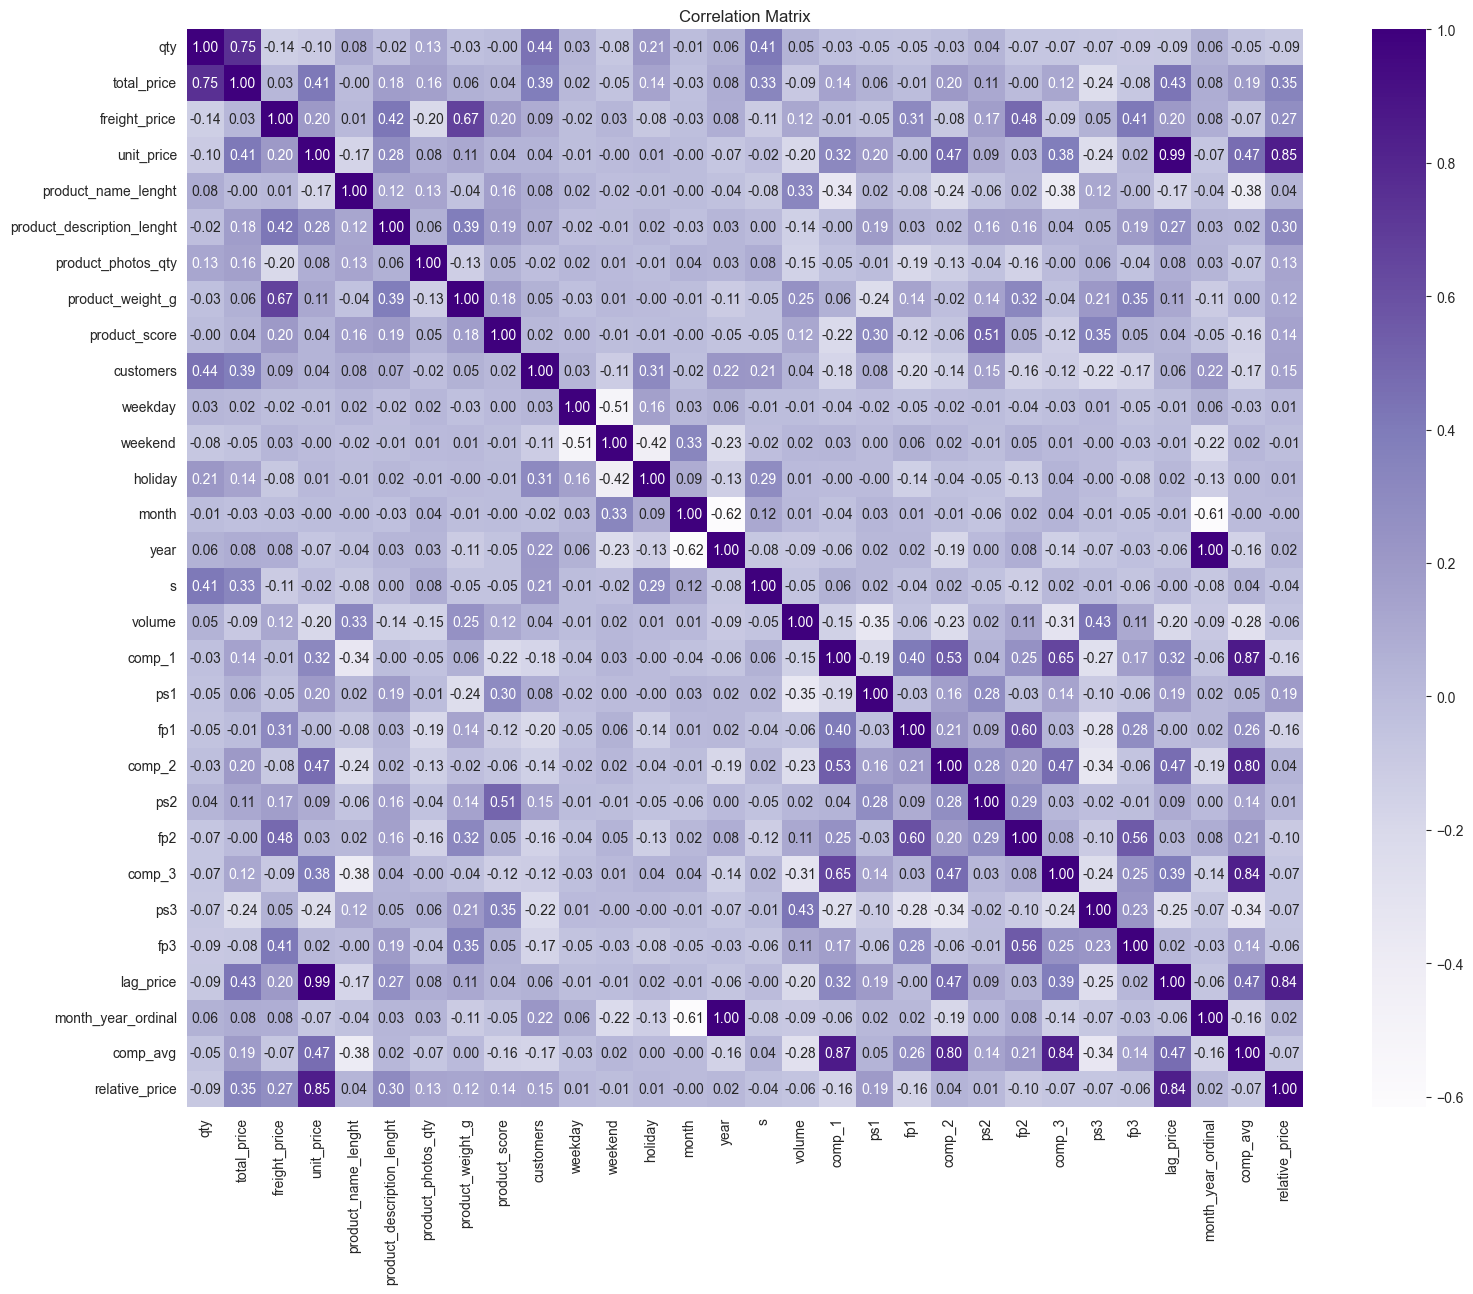

In [74]:
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(18,14))
sns.heatmap(corr_matrix, annot=True, cmap='Purples', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()